# 1-Analise e exploração dos dados .

1-Extração dos dados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/kaggle/input/walmart-sales-analysis/Walmart.csv')

In [3]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-2013,04-10-2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


2-Vericando a quantidada de linhas e colunas.

In [4]:
df.shape

(3203, 12)

3-Verificando a quntidade de ID exclusivos .

In [5]:
df['Order ID'].value_counts()

CA-2013-165330    11
CA-2011-106439     9
CA-2012-104346     9
CA-2012-164882     9
CA-2014-117457     9
                  ..
CA-2014-123701     1
US-2011-167262     1
CA-2014-108091     1
CA-2012-144722     1
CA-2014-119914     1
Name: Order ID, Length: 1611, dtype: int64

4-Existem uma certa quantidade de Ids exclusivos que possam estar duplicados.

In [6]:
id_duplicate=df['Order ID'].value_counts()

In [7]:
id_duplicate.value_counts()

1     819
2     396
3     193
4     105
5      43
6      24
7      21
8       5
9       4
11      1
Name: Order ID, dtype: int64

5-Máscaras Booleanas

In [8]:
df_mask=id_duplicate==2

In [9]:
sum(df_mask)

396

6-Número  de Ids duplicados para contagem 2

In [10]:
df_feature=id_duplicate.index[df_mask]

In [11]:
df_feature=list(df_feature)

In [12]:
id_duplicate[df_feature]

US-2014-155999    2
US-2014-105998    2
US-2013-168095    2
CA-2013-140417    2
CA-2011-138240    2
                 ..
CA-2013-165995    2
CA-2012-165057    2
CA-2012-148376    2
CA-2012-151253    2
US-2011-133130    2
Name: Order ID, Length: 396, dtype: int64

In [13]:
df_feature[0:3]

['US-2014-155999', 'US-2014-105998', 'US-2013-168095']

8-Identificando os ids duplicados.

In [14]:
df.loc[df['Order ID'].isin(df_feature[0:5]),:].head(5)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
1281,CA-2013-140417,26-09-2013,30-09-2013,Katrina Edelman,United States,Tigard,Oregon,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",60.05,9.0,22.52
1282,CA-2013-140417,26-09-2013,30-09-2013,Katrina Edelman,United States,Tigard,Oregon,Binders,GBC Poly Designer Binding Covers,5.02,1.0,-3.52
1287,US-2014-155999,08-08-2014,14-08-2014,Jay Kimmel,United States,San Diego,California,Phones,GE DSL Phone Line Filter,159.96,5.0,18.00
1288,US-2014-155999,08-08-2014,14-08-2014,Jay Kimmel,United States,San Diego,California,Binders,Avery Printable Repositionable Plastic Tabs,13.76,2.0,4.64
2575,US-2013-168095,16-07-2013,21-07-2013,Mark Cousins,United States,Portland,Oregon,Chairs,Bevis Steel Folding Chairs,230.28,3.0,23.03


In [15]:
df
df.loc[df.duplicated(subset=['Order ID','Order Date','Ship Date','Customer Name','Country','City','State','Product Name'])]

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
910,US-2014-103828,14-08-2014,14-08-2014,Jay Kimmel,United States,San Francisco,California,Supplies,Staples,31.92,4.0,9.26
2523,CA-2011-166961,27-12-2011,31-12-2011,Cynthia Delaney,United States,Moreno Valley,California,Fasteners,Staples,7.86,3.0,3.62
2562,CA-2014-118017,04-12-2014,07-12-2014,Lena Cacioppo,United States,Thornton,Colorado,Accessories,Memorex Micro Travel Drive 16 GB,102.34,8.0,14.07


9-Nota:Certamente existem ids duplicados , porém não completamente , existem clientes que efecturam a compra mas , com quantidades diferentes.

10-Procurando por dados  nulos.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


In [17]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

11-Não existem dados nulos .

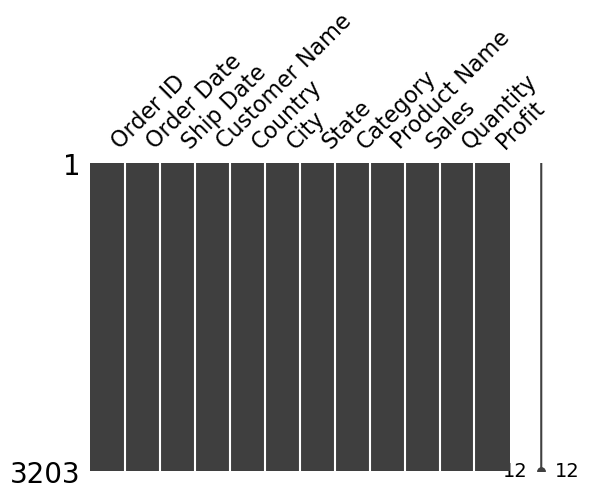

In [18]:
import missingno as msno
ax=msno.matrix(df, figsize=(6,4))

<AxesSubplot:>

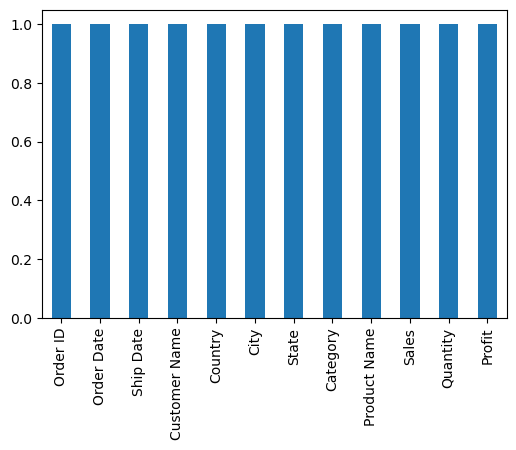

In [19]:
fig , ax =plt.subplots(figsize=(6,4))
(1-df.isnull().mean()).abs().plot.bar(ax=ax)

12-Verificando se existe dados duplicados no dataset

In [20]:
df.duplicated().sum()

0

13-Não existem dados duplicados.

# Exploração dos dados na categorias númericas

In [21]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-2013,04-10-2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


In [22]:
df['Sales'].describe()

count     3203.000000
mean       226.493266
std        524.876911
min          0.990000
25%         19.440000
50%         60.840000
75%        215.810000
max      13999.960000
Name: Sales, dtype: float64

In [23]:
import seaborn as sns

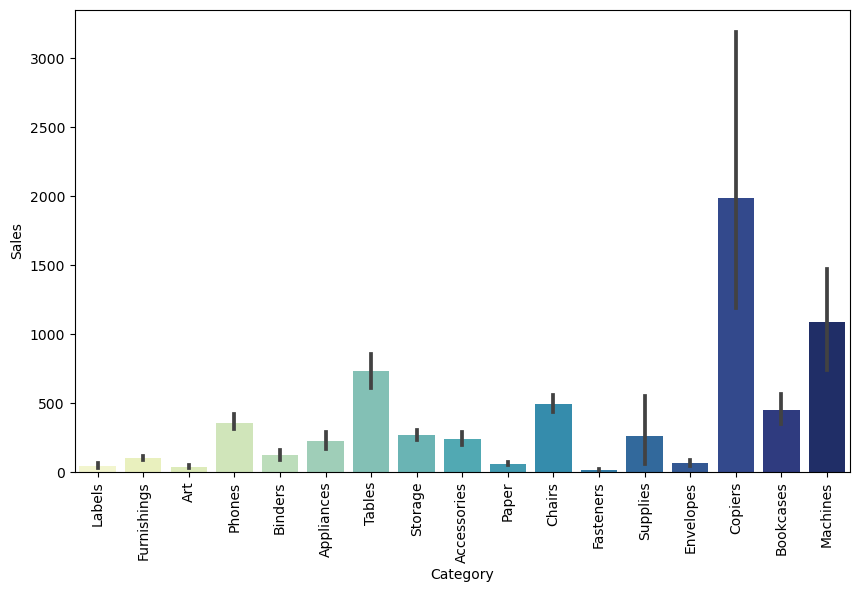

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Sales',data=df,palette='YlGnBu')
plt.xticks(rotation=90)
plt.show()


Nota:Nota que a categoria labels se repete poucas vezes , ou seja é a ctegoria que tem menos vendas.*texto em itálico* **negrito**

In [25]:
df['Profit'].value_counts()

 6.22      25
 0.00      22
 9.33      20
 15.55     11
 3.11       9
           ..
 136.62     1
-195.48     1
 18.50      1
 4.35       1
 72.95      1
Name: Profit, Length: 2164, dtype: int64

In [26]:
df['Profit'].describe()

count    3203.000000
mean       33.849138
std       174.109155
min     -3399.980000
25%         3.850000
50%        11.170000
75%        33.000000
max      6719.980000
Name: Profit, dtype: float64

Nota que , certamente existem produtos (Cidade) que estão a ter lucros negativose e zeros.

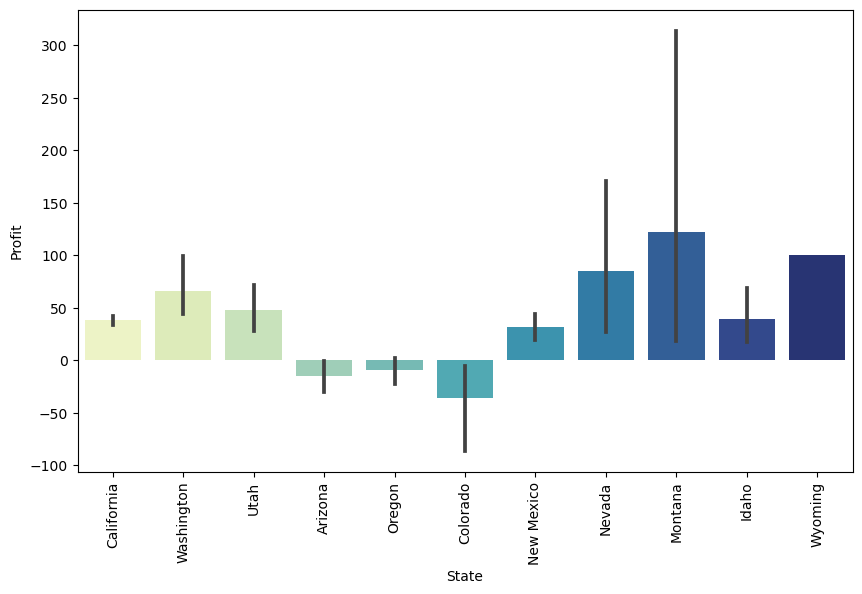

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='Profit',data=df,palette='YlGnBu')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


Convertendo Colunas para datas.

In [29]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   float64       
 11  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 300.4+ KB


Reanomeando colunas nomes de coluna com espaço

In [31]:
df.rename(columns={'Order ID':'OrderID','Ship Date':'ShipDate','Customer Name':'CustomerName','Product Name':'ProductName','Order Date':'OrderDate	'},inplace=True)

Analisando a porcentagem de Produtos que tenhem lucros negativos .

In [32]:
lista_negative=[]
lista_positive=[]
lista_zero=[]
x=int(0)
y=int(0)
z=int(0)



In [33]:
for x in range(len(df['Profit'])):
  if df.Profit[x] < 0 :
    lista_negative.append(df.Profit[x])
    
len(lista_negative)

318

In [34]:
x=len(lista_negative)

In [35]:
for y in range(len(df['Profit'])):
  if df.Profit[y] > 0 :
    lista_positive.append(df.Profit[y])
len(lista_positive)

2863

In [36]:
y=len(lista_positive)

In [37]:
for z in range(len(df['Profit'])):
  if df.Profit[z] == 0 :
    lista_zero.append(df.Profit[z])
len(lista_zero)

22

In [38]:
z=len(lista_zero)

In [39]:
vals=[y,x,z]
labels=['Qt lucros  Positivos','Qt de lucros negativos','Qt de lucros iguais a zero']

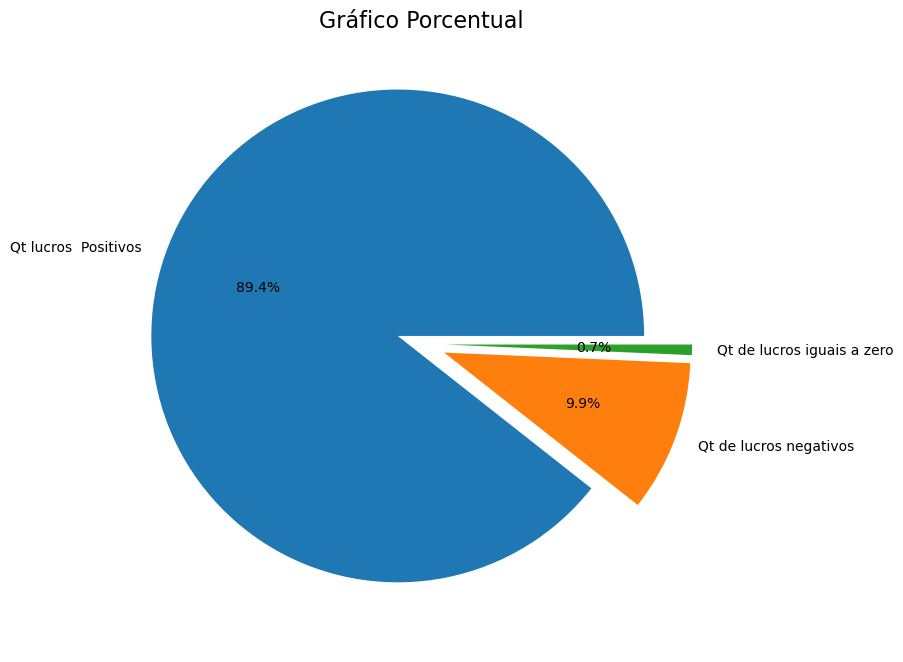

In [40]:
fig,ax=plt.subplots(figsize=(10,8))
explode=(0.1,0.1,0.1)
ax.set_title('Gráfico Porcentual',fontsize=16)
ax.pie(vals,labels=labels,autopct='%.1f%%', explode=explode)
plt.show()

Categorias que tenhem a maior quantidade de de vendas.

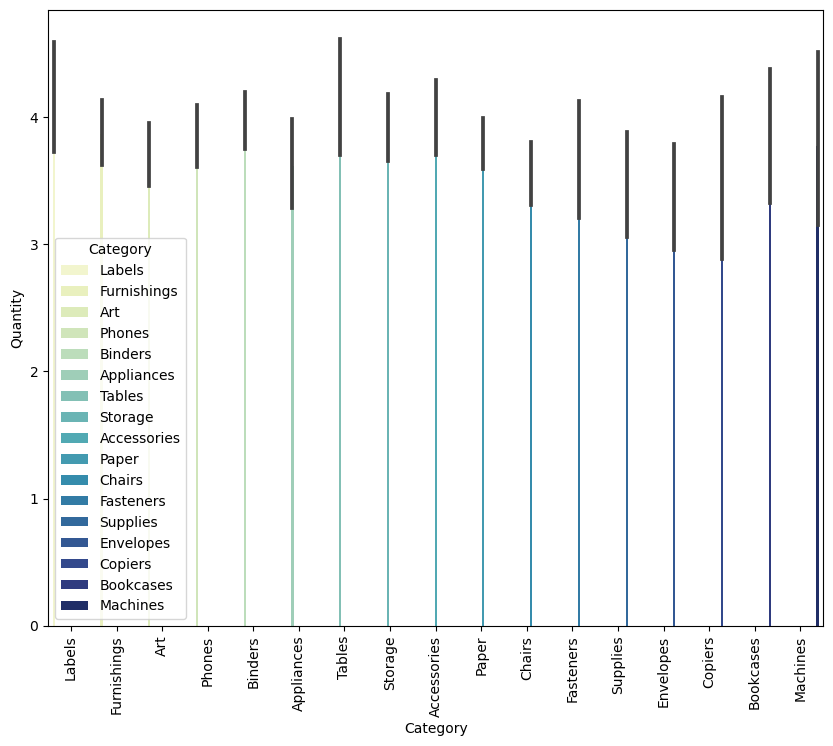

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x='Category',y='Quantity', hue='Category',data=df,palette='YlGnBu')
plt.xticks(rotation=90)
plt.show()

In [42]:
df

,OrderID,OrderDate\t,ShipDate,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-04-10,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


Nota:certamente existe uma porcentagem de valores que tenhem como lucros zeros.

<AxesSubplot:>

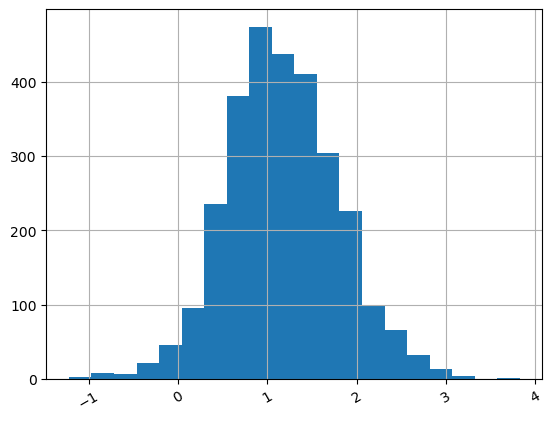

In [43]:
df_mask_zero=df['Profit']==0
df['Profit'][~df_mask_zero].apply(np.log10).hist(bins=20,xrot=30)

Nomes dos produtos que tenhem como lucros zeros.

<AxesSubplot:>

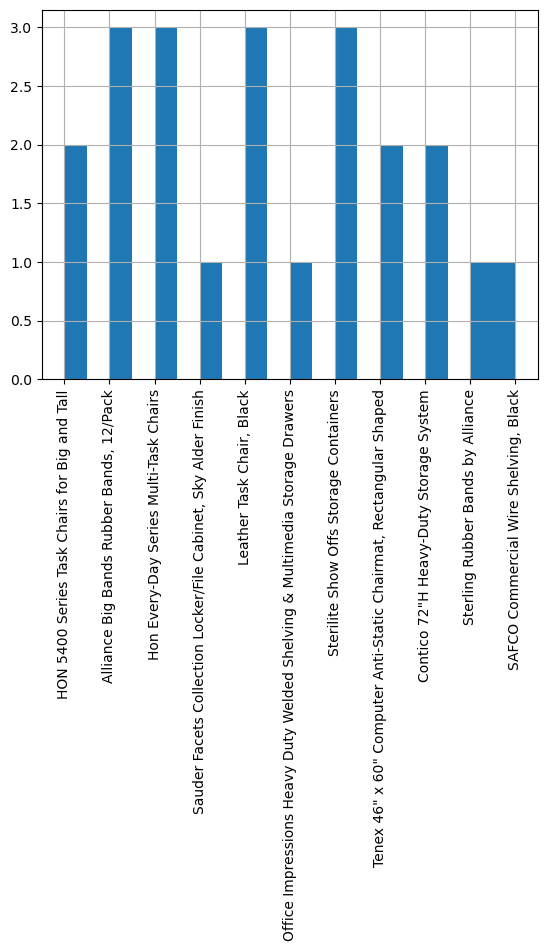

In [44]:
df.loc[df.Profit == 0,'ProductName'].hist(bins=20,xrot=90)

Nome dos estados que tenhem como lucro zero.

<AxesSubplot:>

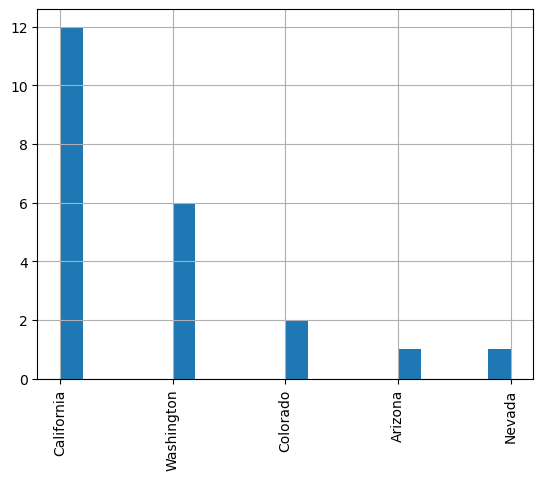

In [45]:
df.loc[df.Profit==0,'State'].hist(bins=20,xrot=90)

Nome das cidades que tenhem como lucro zero

<AxesSubplot:>

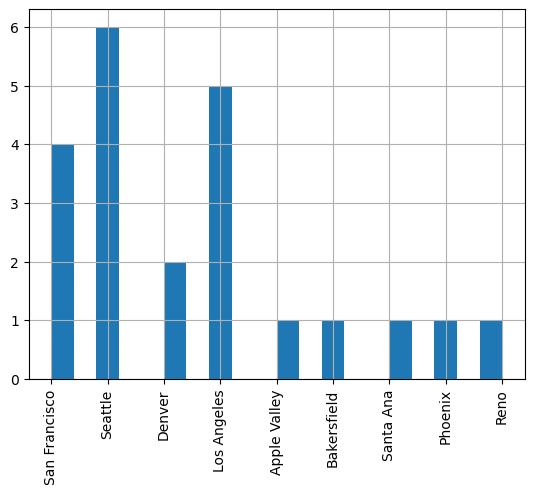

In [46]:
df.loc[df.Profit==0,'City'].hist(bins=20,xrot=90)

Text(0.5, 1.0, 'Porcentagem de produtos que possume Lucro de zero')

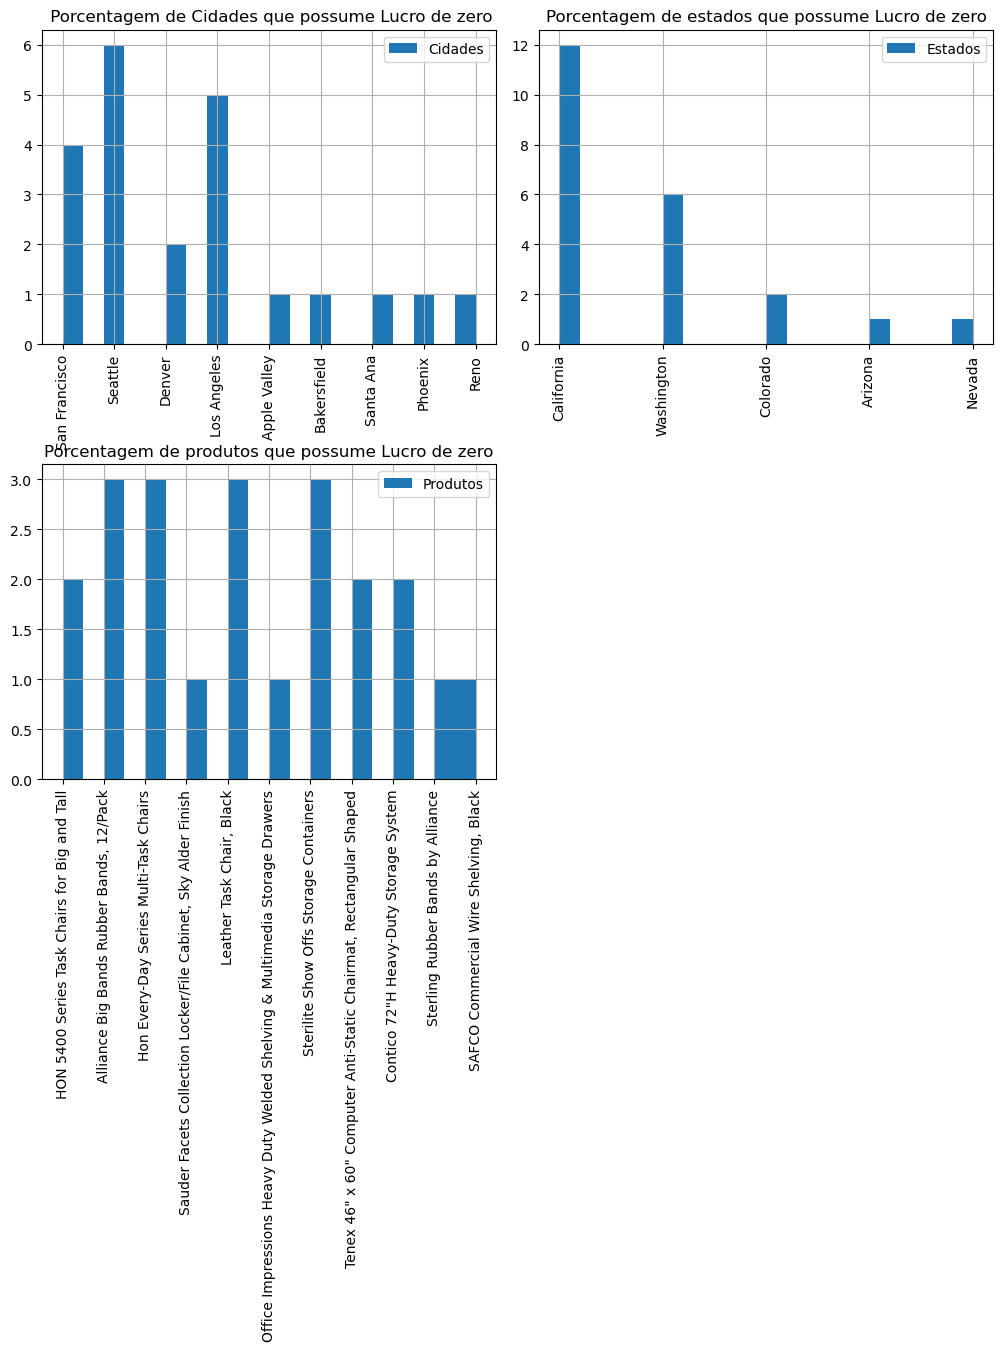

In [47]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
df.loc[df.Profit==0,'City'].hist(bins=20,xrot=90)
plt.xticks(rotation=90)
plt.legend(['Cidades'])
plt.title(' Porcentagem de Cidades que possume Lucro de zero')
plt.tight_layout()


plt.subplot(2,2,2)
df.loc[df.Profit==0,'State'].hist(bins=20,xrot=90)
plt.xticks(rotation=90)
plt.legend(['Estados'])
plt.title('Porcentagem de estados que possume Lucro de zero')
plt.tight_layout()


plt.subplot(2,2,3)
df.loc[df.Profit==0,'ProductName'].hist(bins=20,xrot=90)
plt.xticks(rotation=90)
plt.legend(['Produtos'])
plt.title('Porcentagem de produtos que possume Lucro de zero')





In [48]:
lista_1=df.loc[df.Profit < 0,'ProductName']
lista_1[0:3]


28    Flexible Leather- Look Classic Collection Ring...
30               Logitech K350 2.4Ghz Wireless Keyboard
31    Deflect-o DuraMat Lighweight, Studded, Beveled...
Name: ProductName, dtype: object

In [49]:
lista_2=df.loc[df.Profit < 0,'City']
lista_2[0:3]

28    Portland
30      Aurora
31      Aurora
Name: City, dtype: object

In [50]:
lista_3=df.loc[df.Profit < 0,'State']
lista_3[0:3]

28      Oregon
30    Colorado
31    Colorado
Name: State, dtype: object

In [51]:
lista_12=df.loc[df.Profit > 0 ,'ProductName']
lista_12[0:3]

0    Self-Adhesive Address Labels for Typewriters b...
1    Eldon Expressions Wood and Plastic Desk Access...
2                                           Newell 322
Name: ProductName, dtype: object

In [52]:
lista_34=df.loc[df.Profit > 0 ,'City']
lista_34[0:3]

0    Los Angeles
1    Los Angeles
2    Los Angeles
Name: City, dtype: object

In [53]:
lista_56=df.loc[df.Profit > 0 ,'State']
lista_56[0:3]

0    California
1    California
2    California
Name: State, dtype: object

# Explorando as caractéristicas Categóricas

In [54]:
df['City'].value_counts()

Los Angeles       747
San Francisco     510
Seattle           428
San Diego         170
Phoenix            63
                 ... 
Cheyenne            1
Yucaipa             1
Redding             1
Citrus Heights      1
Layton              1
Name: City, Length: 169, dtype: int64

Nota que : Cidades como Los Angeles , San Francisco ,Seattle ,San Diego  ,Phoenix ,são as cidades que mais se repetem..

In [55]:
df['ProductName'].value_counts()

Staples                                                 60
Avery Non-Stick Binders                                  8
Bretford Rectangular Conference Table Tops               7
Global Troy Executive Leather Low-Back Tilter            7
SAFCO Arco Folding Chair                                 7
                                                        ..
Avery 505                                                1
RCA ViSYS 25423RE1 Corded phone                          1
Master Giant Foot Doorstop, Safety Yellow                1
Bush Westfield Collection Bookcases, Fully Assembled     1
Avaya 5410 Digital phone                                 1
Name: ProductName, Length: 1494, dtype: int64

In [56]:
df['State'].value_counts()

California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: State, dtype: int64

In [57]:
df.head(3)

,OrderID,OrderDate\t,ShipDate,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


Nota que , certamente existe alguns produtos que  levararam mais tempo a chegar nos seus destinos. (Analisando.)

In [58]:
df.rename(columns={'OrderDate\t':'OrderDate1'},inplace=True)

In [59]:
df['Media de envio de um produto']=(df.ShipDate-df.OrderDate1).abs()

In [60]:
df.rename(columns={'Media de envio de um produto':'Mediadeenviodeumproduto'},inplace=True)

Porcentagem de produtos com tempo de envio.

In [61]:
df['Mediadeenviodeumproduto']=df['Mediadeenviodeumproduto'].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [62]:
df.loc[df.Mediadeenviodeumproduto <=4,'ProductName'].head(5)

235                                 KI Conference Tables
236                    Fellowes Officeware Wire Shelving
258        Eldon Stackable Tray, Side-Load, Legal, Smoke
259    Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...
270    Binney & Smith Crayola Metallic Crayons, 16-Co...
Name: ProductName, dtype: object

In [63]:
df.loc[df.Mediadeenviodeumproduto <=5,'State'].count()

166

<AxesSubplot:>

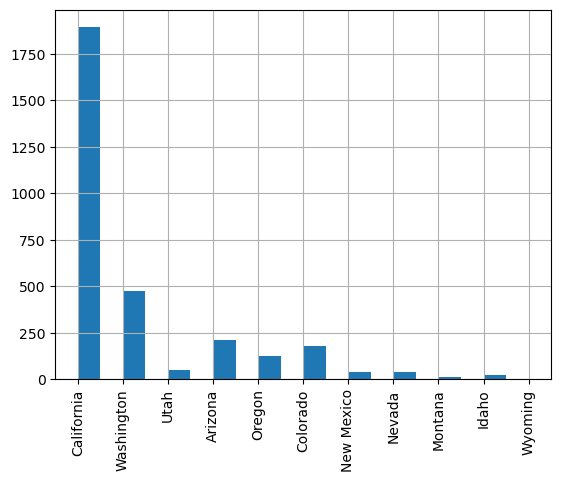

In [64]:
df.loc[df.Mediadeenviodeumproduto >=5,'State'].hist(bins=20,xrot=90)

Nota que , podemos ver que o estado Idaho tem o melhor tempo de envio, Sera ? , veremos.

In [65]:
df['Mediadeenviodeumproduto']

0         345600000000000
1        7257600000000000
2        7257600000000000
3        7257600000000000
4        7257600000000000
              ...        
3198    14947200000000000
3199     3024000000000000
3200     3024000000000000
3201     3024000000000000
3202    13219200000000000
Name: Mediadeenviodeumproduto, Length: 3203, dtype: int64

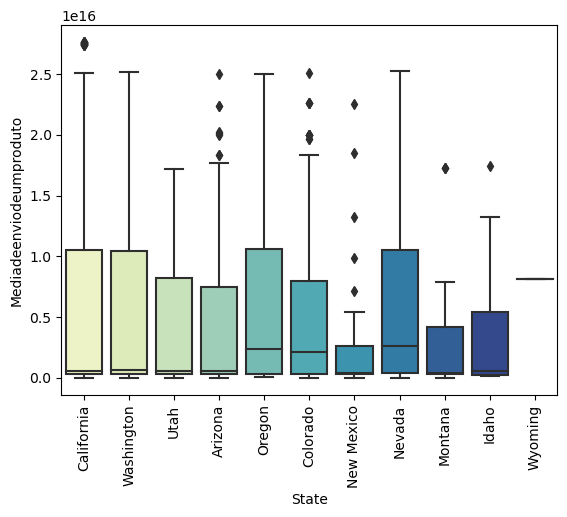

In [66]:
sns.boxplot(x='State',y='Mediadeenviodeumproduto',palette='YlGnBu',data=df)
plt.xticks(rotation=90)
plt.show()

In [67]:
df['Mediadeenviodeumproduto']=df['Mediadeenviodeumproduto'].astype('float64')

Criando novos atributos:

In [68]:
df['Tempo de envio em dias de um produto.']=(df.ShipDate-df.OrderDate1).abs()

In [69]:
df

,OrderID,OrderDate1,ShipDate,CustomerName,Country,City,State,Category,ProductName,Sales,Quantity,Profit,Mediadeenviodeumproduto,Tempo de envio em dias de um produto.
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,3.456000e+14,4 days
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,7.257600e+15,84 days
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,7.257600e+15,84 days
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,7.257600e+15,84 days
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,7.257600e+15,84 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-04-10,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,1.494720e+16,173 days
3199,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,3.024000e+15,35 days
3200,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,3.024000e+15,35 days
3201,CA-2014-121258,2014-02-27,2014-04-03,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,3.024000e+15,35 days


In [70]:
graf_dados=df.groupby('State').mean().Mediadeenviodeumproduto.sort_values(ascending=False)

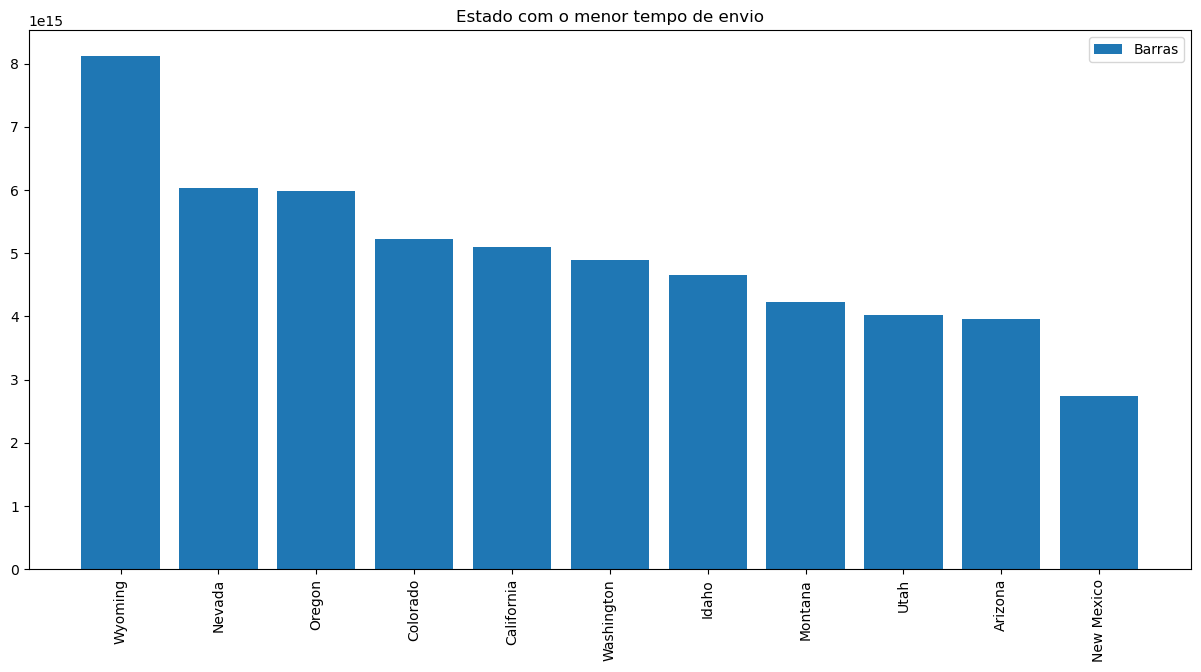

<Figure size 640x480 with 0 Axes>

In [71]:

plt.figure(figsize=(15,7))
plt.bar(graf_dados.index,graf_dados.values,color ='C0')
plt.title('Estado com o menor tempo de envio')
plt.xticks(rotation=90)
plt.legend(['Barras'])
plt.show()
plt.tight_layout()



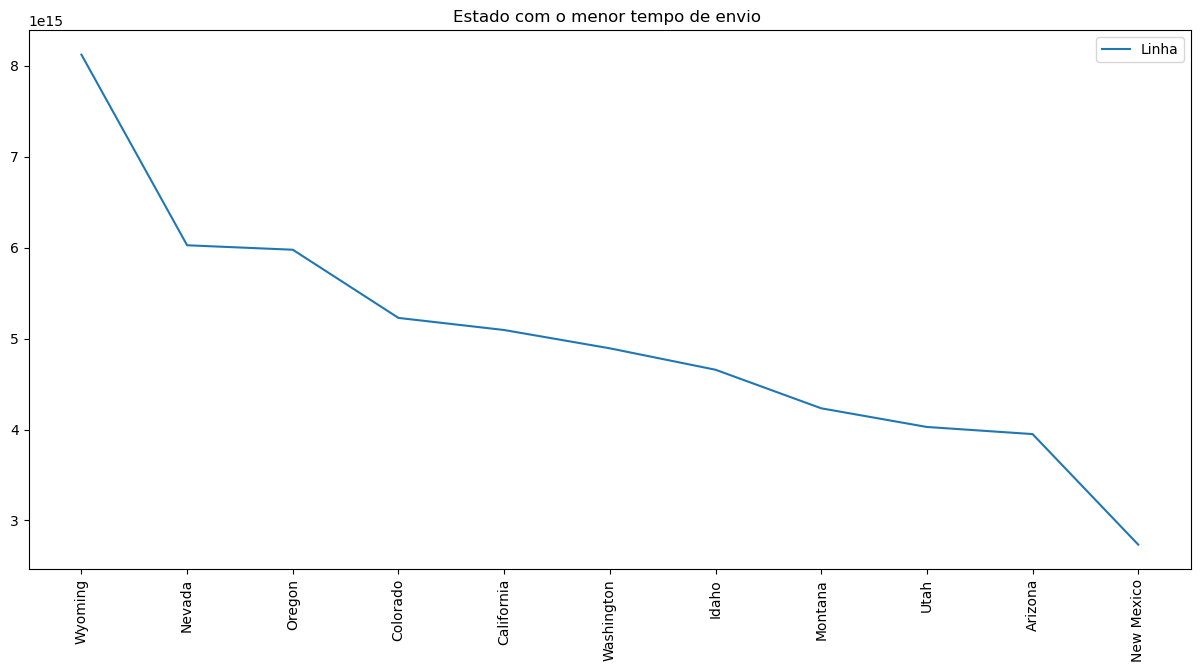

In [72]:

plt.figure(figsize=(15,7))
plt.plot(graf_dados.index,graf_dados.values,color ='C0')
plt.title('Estado com o menor tempo de envio ')
plt.xticks(rotation=90)
plt.legend(['Linha'])
plt.show()